# Q2.b

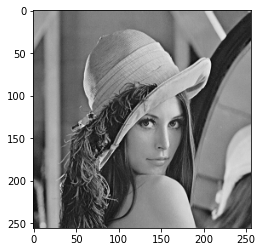

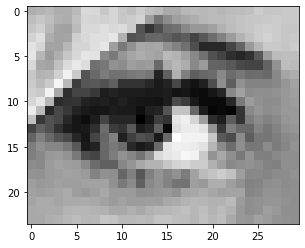

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
img_grey = cv2.imread("lena256.png",0)
eye = cv2.imread("eye256.png",0)
plt.imshow(img_grey,cmap='gray')
plt.show() 
plt.imshow(eye,cmap='gray')
plt.show() 

### Lena image resized because processing time was very high

### NORMALIZED CROSS CORRELATION VARIENT (Produces very good results) 

Max value :1.0
Top left corner : 120 120
here3


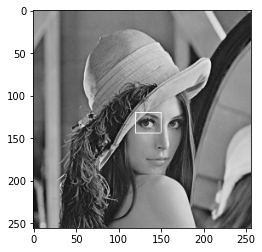

In [13]:

out=np.zeros([(img_grey.shape[0]-eye.shape[0]),(img_grey.shape[1])-eye.shape[1]])
values=[]
val=0;
for i in range(0,eye.shape[0]):
    for j in range(0,eye.shape[1]):
        val+=eye[i,j]
wbar=val/(eye.shape[1]*eye.shape[0])


for x in range(0,(img_grey.shape[0]-eye.shape[0])):
    for y in range(0,(img_grey.shape[1]-eye.shape[1])):        
        val2=0
        for i in range(0,eye.shape[0]):
            for j in range(0,eye.shape[1]):
                val2+=img_grey[x+i,y+j]
        fbar=val2/(eye.shape[0]*eye.shape[1])
        term1=0;term2=0;
        for i in range(0,eye.shape[0]):
            for j in range(0,eye.shape[1]):
                term1+=((img_grey[x+i,y+j]-fbar)**2)
                term2+=((eye[i,j]-wbar)**2)
        denom=(term1*term2)**(0.5)
        for i in range(0,eye.shape[0]):
            for j in range(0,eye.shape[1]):
                out[x,y]+=(img_grey[x+i,y+j]-fbar)*(eye[i,j]-wbar)
        out[x,y]*=(1/(denom))
        values.append(out[x,y])


#print("here2")
for i in range(0,out.shape[0]):
    for j in range(0,out.shape[1]):
        if(out[i,j]==(max(values))):
            c1=i
            c2=j
print("Max value :",end="")
print(max(values))
print("Top left corner : ",end="")
print(c1,c2)

print("here3")
#Drawing boundary
for i in range(c1,c1+eye.shape[0]):
        img_grey[i,c2]=255
        img_grey[i,c2+eye.shape[1]]=255
for j in range(c2,c2+eye.shape[1]):
    img_grey[c1,j]=255
    img_grey[c1+eye.shape[0],j]=255


plt.imshow(img_grey,cmap='gray')
plt.show() 

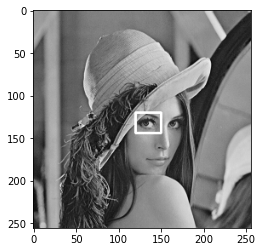

In [17]:
# Inbuilt template matching :
img = cv2.imread('lena256.png',0)
template = cv2.imread('eye256.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
threshold = 1
# Store the coordinates of matched area in a numpy array
loc = np.where( res >= threshold)
# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (255,255,255),2)
plt.imshow(img,cmap='gray')
plt.show() 